In [88]:
import sys
sys.path
sys.path.append('/home/helge/code/back_of_the_envelope')

import pandas as pd
import random
import json
import re
import numpy as np

population = pd.read_csv('data/12411-0005.csv', sep=';', encoding='latin1', skiprows=range(5))
deaths = pd.read_csv('data/12613-0003.csv', sep=';', encoding='latin1', skiprows=range(5))
deaths = deaths[deaths['Unnamed: 0'] == 'Insgesamt']

In [77]:
data = {
    "age": [],
    "population": [],
    "deaths": []
}

for _, row in population.iterrows():
    age = row['Unnamed: 0']
    pop = row['Stichtag.4']
    if type(age) == str:
        # print(age)
        if age.startswith('unter'):
            data["age"].append(0)
            data["population"].append(int(pop))
        elif age.endswith('Jährige') or age.endswith(' und mehr'):
            data["age"].append(int(re.match(r"\d+", age).group()))
            data["population"].append(int(pop))
        else:
            pass
            # print(row)

In [78]:
for _, row in deaths.iterrows():
    age = row['Unnamed: 1']
    pop = row['2021']
    # print(row)
    if type(age) == str:
        # print(age)
        if age.startswith('unter'):
            # data["age"].append(0)
            data["deaths"].append(int(pop))
        elif age.endswith('Jährige') or age.endswith(' und mehr'):
            age_int = int(re.match(r"\d+", age).group())
            if age_int <= 85:
                data["deaths"].append(int(pop))
            else:
                data["deaths"][-1] += int(pop)
        else:
            pass

<AxesSubplot: xlabel='age', ylabel='chance'>

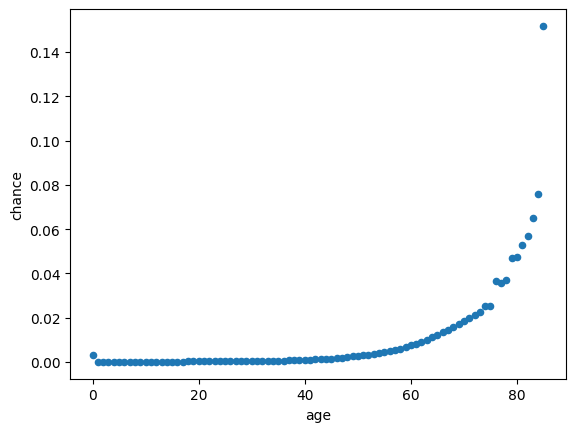

In [81]:
{k: len(v) for k,v in data.items()}
df = pd.DataFrame(data)
df['chance'] = df.deaths / df.population

df.plot.scatter('age', 'chance')

In [82]:
chance_to_die_lookup = {
    row['age']: row['chance'] for _, row in df.iterrows()
}

In [101]:
def will_die(age):
    if age >= 85:
        return random.random() < chance_to_die_lookup[85]
    else:
        return random.random() < chance_to_die_lookup[age]

def random_age():
    age = 30
    while not will_die(age):
        age += 1
    return age

np.mean([random_age() for _ in range(1000)])

80.57